# Overview

The model works on a small portion of data divided into train and test datasets.

The dataset sample consists of X images that are categorized into 33 classes.

Each image has a total of 784 pixels, and each pixel value is an integer between 0 and 255.

# Importing Data

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#TODO: 
#1. read csv files and create dataframes
train_df = pd.read_csv('input/train.csv',sep=',')
test_df = pd.read_csv('input/test.csv',sep=',')
#2. Create arrayes from the files and assign them to training testing variables
trainingArr = np.array(train_df, dtype = 'float32')
testingArr = np.array(test_df, dtype='float32')

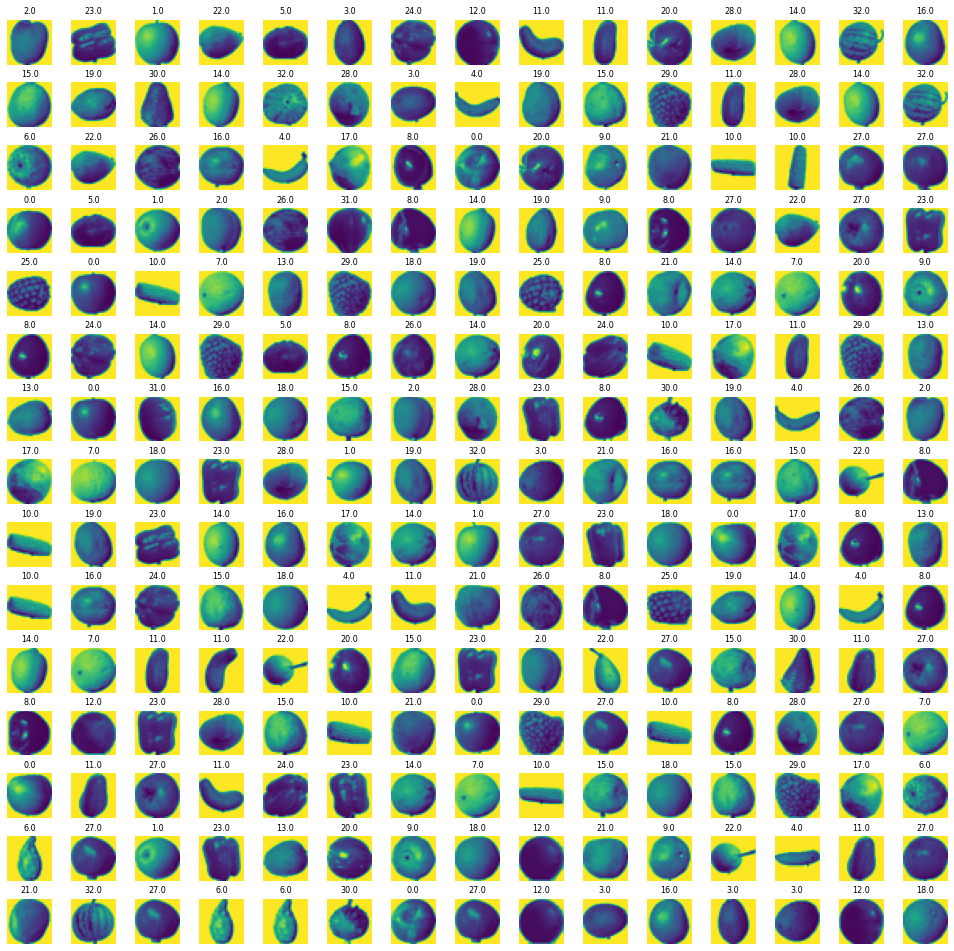

In [16]:
# Display some images for manual testing
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off') # just to avoid showing the pixels around the images because we gonna present many images

plt.subplots_adjust(hspace=0.4)

# Model Training

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

#TODO:
#1. Split training and testing data into x (pixels) and y (labels)
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

#2. Create validation dataset
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

#3. Reshape the data for CNN so the input us in the correct shape
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

#4. Build the CNN model using keras
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation="relu")) #Convulotional layer with 32 filters

model.add(MaxPooling2D(pool_size=(2, 2))) #Add max pooling layer

model.add(Dropout(0.2)) #Dropout for regulariztion

model.add( Flatten() ) #Flatten input into a vector to be accepted in ANN

# Model Evaluation

In [8]:
#TODO: Evaluate model using keras

# Prediction

In [ ]:
#TODO: Use the model to make predictions.